let's proceed with the implementation of **Support Vector Classification (SVC)** using Scikit-learn. We'll go through two examples to illustrate different aspects of SVC.


**4. Support Vector Classification (SVC) with Scikit-learn**

Scikit-learn provides the `SVC` class in the `sklearn.svm` module for classification tasks.

**Key Parameters of `sklearn.svm.SVC`:**

* **`C` (float, default=1.0):** Regularization parameter. The strength of the regularization is inversely proportional to `C`. Must be strictly positive. Smaller `C` values lead to a wider margin and more margin violations (softer margin, stronger regularization). Larger `C` values lead to a narrower margin and fewer margin violations (harder margin, weaker regularization).
* **`kernel` (str, default='rbf'):** Specifies the kernel type to be used in the algorithm. Common values:
    * `'linear'`: For a linear SVM.
    * `'poly'`: For a polynomial kernel.
    * `'rbf'`: For a Radial Basis Function kernel (a good default).
    * `'sigmoid'`: For a sigmoid kernel.
* **`gamma` (float or {'scale', 'auto'}, default='scale'):** Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
    * If `gamma='scale'` (default), then it uses `1 / (n_features * X.var())` as value of gamma.
    * If `gamma='auto'`, it uses `1 / n_features`.
    * A float value directly sets gamma. Small gamma means a large variance (smoother model), large gamma means a small variance (more complex model, can overfit).
* **`degree` (int, default=3):** Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.
* **`coef0` (float, default=0.0):** Independent term in kernel function. It is only significant in `'poly'` and `'sigmoid'`.
* **`probability` (bool, default=False):** Whether to enable probability estimates. This must be enabled prior to calling `fit`, and it will slow down training. If `True`, `predict_proba` method is available.
* **`shrinking` (bool, default=True):** Whether to use the shrinking heuristic (can speed up training).
* **`random_state` (int):** For reproducibility.

---


**Example 1: Linear SVM, Margin, and the `C` Parameter**

We'll use the Iris dataset for this example, focusing on two classes (Setosa and Versicolor) and two features (sepal length and sepal width) for easy 2D visualization of the decision boundary and margin.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load and Prepare Iris Data ---
iris = load_iris()
# We'll use only the first two features (sepal length, sepal width) and the first two classes (setosa, versicolor)
X_iris = iris.data[:100, :2]  # First 100 samples, first 2 features
y_iris = iris.target[:100]    # Corresponding first 100 labels (0 for setosa, 1 for versicolor)

feature_names_iris_subset = iris.feature_names[:2]
target_names_iris_subset = iris.target_names[:2]

print("Iris Dataset Subset Loaded (2 classes, 2 features).")
print(f"Features shape: {X_iris.shape}, Target shape: {y_iris.shape}")


Iris Dataset Subset Loaded (2 classes, 2 features).
Features shape: (100, 2), Target shape: (100,)


In [3]:
# --- 2. Split Data ---
X_train_iris_raw, X_test_iris_raw, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)


In [4]:
# --- 3. Feature Scaling ---
scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris_raw)
X_test_iris = scaler_iris.transform(X_test_iris_raw)
print("\nIris Data Scaled.")

# --- Function to plot decision boundary, margins, and support vectors ---
def plot_svc_decision_boundary(svm_model, X, y, title):
    plt.figure(figsize=(10, 6))
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='k')

    # Create a mesh to plot in
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
               s=150, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.xlabel(f"Scaled {feature_names_iris_subset[0]}")
    plt.ylabel(f"Scaled {feature_names_iris_subset[1]}")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


Iris Data Scaled.



--- Training Linear SVC with different C values ---
C = 0.1: Test Accuracy = 1.0000, Support Vectors = 24


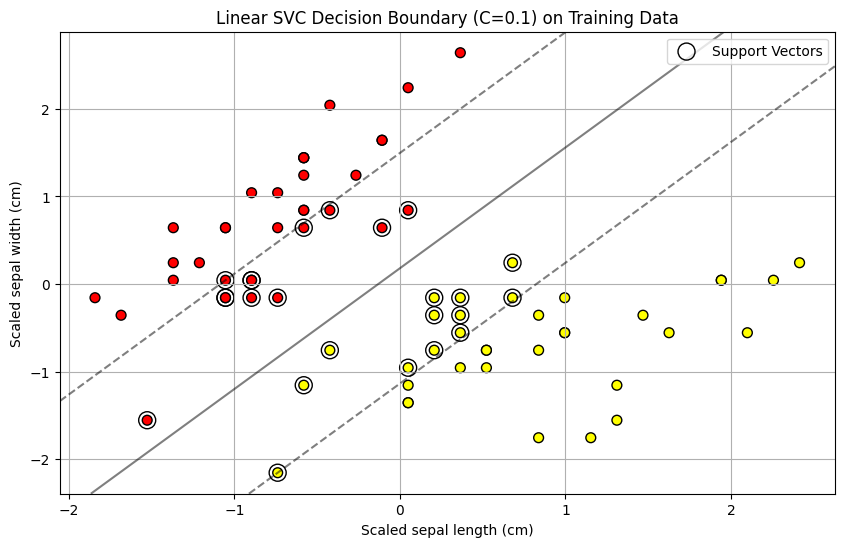

C = 1: Test Accuracy = 1.0000, Support Vectors = 10


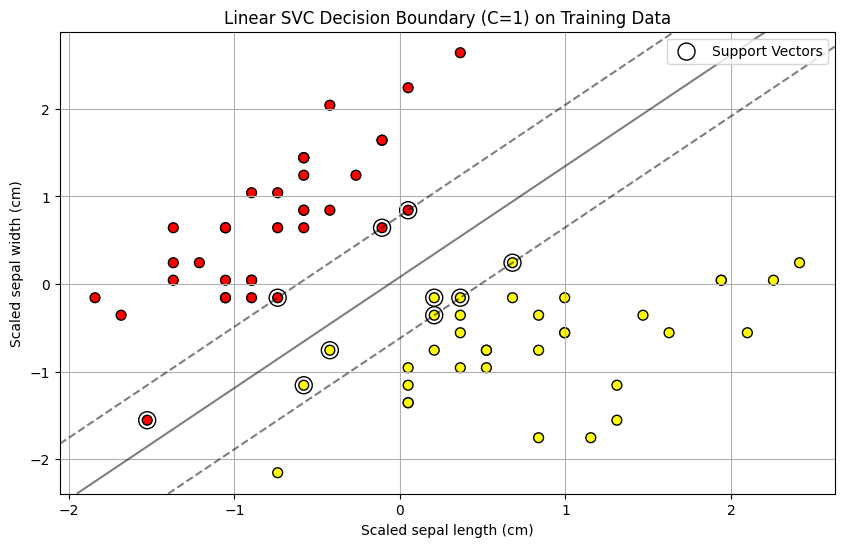

C = 100: Test Accuracy = 1.0000, Support Vectors = 3


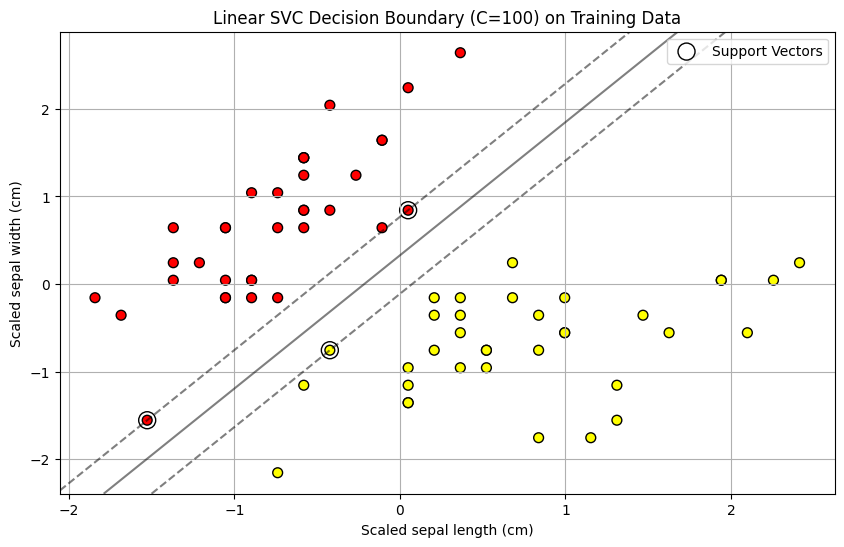

In [5]:
# --- 4. Train Linear SVC models with different C values ---
c_values_linear = [0.1, 1, 100] # Small, medium, large C
models_linear_svc = []

print("\n--- Training Linear SVC with different C values ---")
for C_val in c_values_linear:
    linear_svc = SVC(kernel='linear', C=C_val, random_state=42)
    linear_svc.fit(X_train_iris, y_train_iris)
    models_linear_svc.append(linear_svc)

    y_pred_iris = linear_svc.predict(X_test_iris)
    accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
    print(f"C = {C_val}: Test Accuracy = {accuracy_iris:.4f}, Support Vectors = {len(linear_svc.support_vectors_)}")

    plot_svc_decision_boundary(linear_svc, X_train_iris, y_train_iris,
                               title=f'Linear SVC Decision Boundary (C={C_val}) on Training Data')


**Discussion for Linear SVC Example:**
* When `C` is small (e.g., 0.1), the margin is wider, and the model is more tolerant of misclassifications or points within the margin (stronger regularization).
* When `C` is large (e.g., 100), the margin tends to be narrower, and the model tries harder to correctly classify all training points, potentially fitting to noise (weaker regularization).
* For this simple, well-separated Iris subset, all `C` values might achieve perfect or near-perfect accuracy on the test set, but the visual difference in margins and the number of support vectors will be noticeable.

---

**Example 2: Non-Linear SVM with Kernels (RBF, Polynomial) and Hyperparameter Tuning**

We'll use the `make_moons` dataset from Scikit-learn, which generates data that is not linearly separable, making it ideal for showcasing non-linear kernels.


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# --- 1. Generate Non-Linear Data (make_moons) ---
X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=42)
print("\nmake_moons Dataset Generated.")
print(f"Features shape: {X_moons.shape}, Target shape: {y_moons.shape}")


make_moons Dataset Generated.
Features shape: (200, 2), Target shape: (200,)


In [8]:
# --- 2. Split Data ---
X_train_moons_raw, X_test_moons_raw, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

In [9]:
# --- 3. Feature Scaling ---
scaler_moons = StandardScaler()
X_train_moons = scaler_moons.fit_transform(X_train_moons_raw)
X_test_moons = scaler_moons.transform(X_test_moons_raw)
print("\nmake_moons Data Scaled.")

# --- Function to plot decision boundary (re-defined for this dataset context) ---
def plot_svc_decision_boundary_moons(svm_model, X_train_data, y_train_data, title):
    plt.figure(figsize=(10, 6))
    # Plot data points
    plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data, s=50, cmap='viridis', edgecolors='k', alpha=0.7)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # Use predict for coloring regions, decision_function for boundary lines
    Z_predict = svm_model.predict(xy).reshape(XX.shape)
    ax.contourf(XX, YY, Z_predict, cmap='viridis', alpha=0.3) # Filled contours for class regions
    
    # Plot decision boundary using decision_function if available
    if hasattr(svm_model, "decision_function"):
        Z_boundary = svm_model.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z_boundary, colors='k', levels=[0], alpha=0.8, linestyles=['-'])


    plt.xlabel("Scaled Feature 1")
    plt.ylabel("Scaled Feature 2")
    plt.title(title)
    plt.grid(False) # Usually false for filled contour plots
    plt.show()


make_moons Data Scaled.



--- SVC with RBF Kernel (make_moons) ---
RBF Kernel: C=0.1, gamma=0.5 -> Test Accuracy = 0.8333


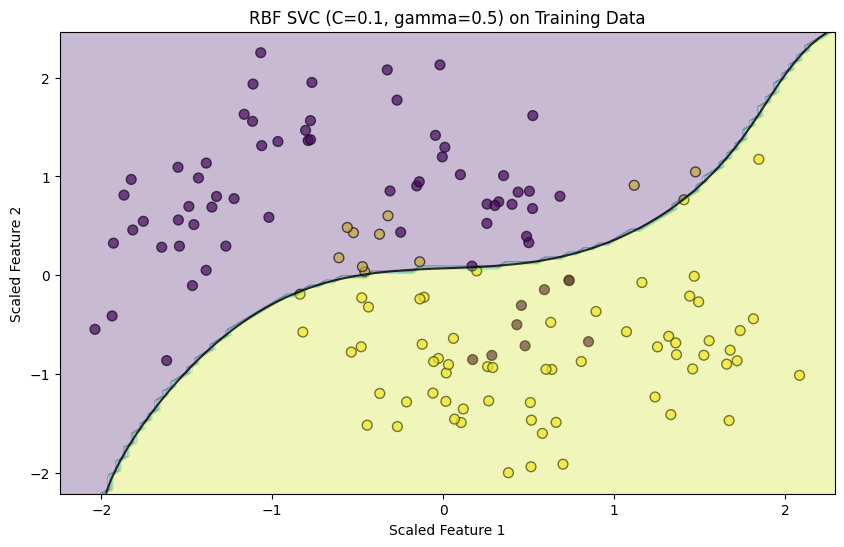

RBF Kernel: C=1, gamma=0.5 -> Test Accuracy = 0.9500


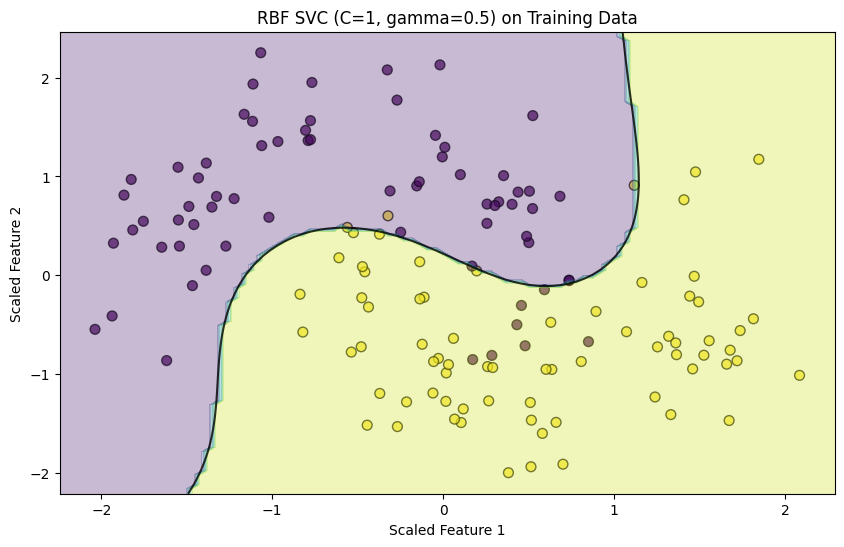

RBF Kernel: C=10, gamma=0.5 -> Test Accuracy = 0.9500


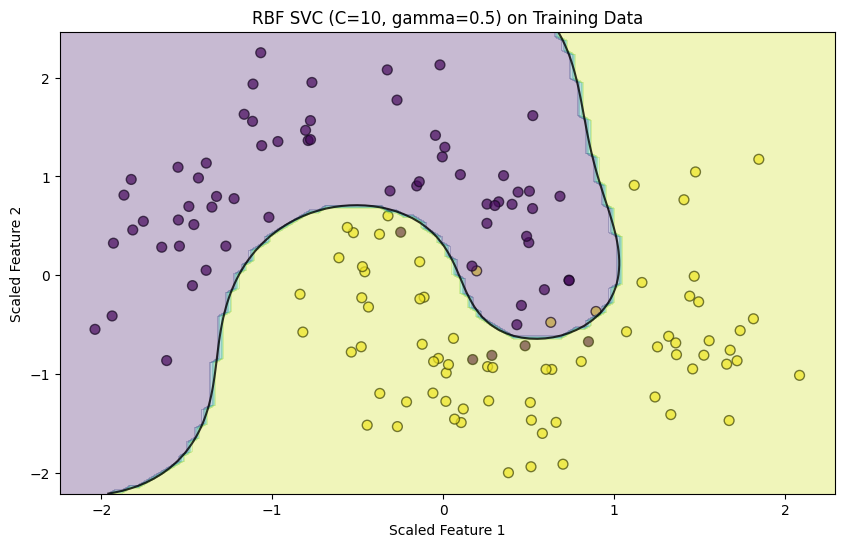

In [11]:
# --- 4. SVC with RBF Kernel - Effect of C and gamma ---
print("\n--- SVC with RBF Kernel (make_moons) ---")
# Fixed gamma, varying C
gamma_fixed_rbf = 0.5
c_values_rbf = [0.1, 1, 10]
for C_val in c_values_rbf:
    rbf_svc = SVC(kernel='rbf', C=C_val, gamma=gamma_fixed_rbf, random_state=42)
    rbf_svc.fit(X_train_moons, y_train_moons)
    y_pred_rbf = rbf_svc.predict(X_test_moons)
    accuracy_rbf = accuracy_score(y_test_moons, y_pred_rbf)
    print(f"RBF Kernel: C={C_val}, gamma={gamma_fixed_rbf} -> Test Accuracy = {accuracy_rbf:.4f}")
    plot_svc_decision_boundary_moons(rbf_svc, X_train_moons, y_train_moons,
                                     title=f'RBF SVC (C={C_val}, gamma={gamma_fixed_rbf}) on Training Data')


RBF Kernel: C=1, gamma=0.1 -> Test Accuracy = 0.8333


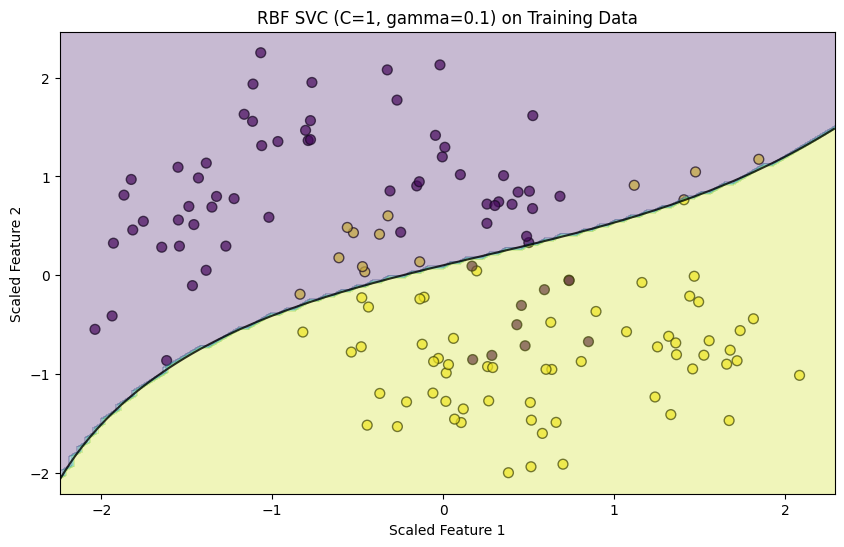

RBF Kernel: C=1, gamma=1 -> Test Accuracy = 0.9333


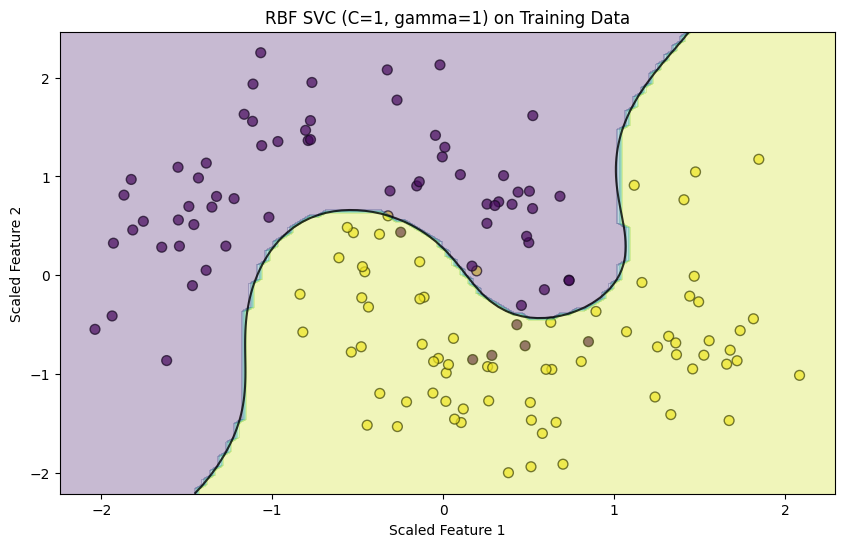

RBF Kernel: C=1, gamma=10 -> Test Accuracy = 0.9500


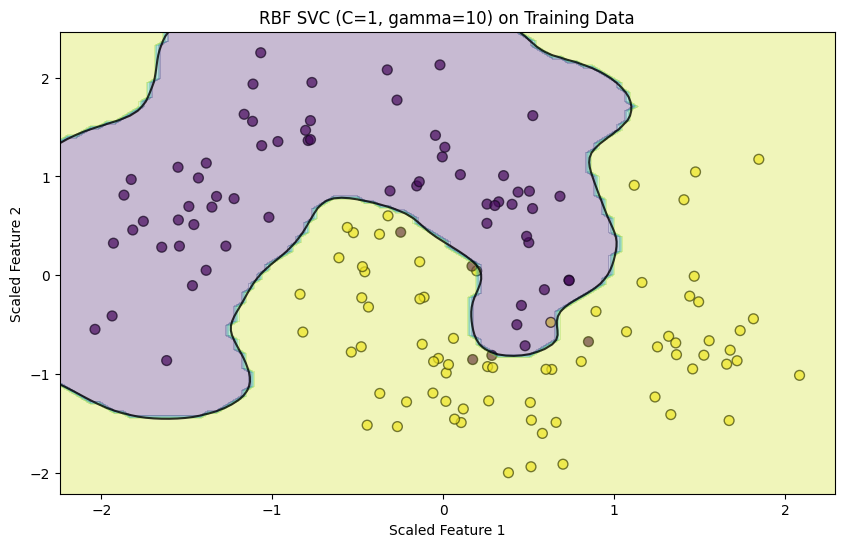

In [12]:
# Fixed C, varying gamma
c_fixed_rbf = 1
gamma_values_rbf = [0.1, 1, 10]
for gamma_val in gamma_values_rbf:
    rbf_svc_gamma = SVC(kernel='rbf', C=c_fixed_rbf, gamma=gamma_val, random_state=42)
    rbf_svc_gamma.fit(X_train_moons, y_train_moons)
    y_pred_rbf_gamma = rbf_svc_gamma.predict(X_test_moons)
    accuracy_rbf_gamma = accuracy_score(y_test_moons, y_pred_rbf_gamma)
    print(f"RBF Kernel: C={c_fixed_rbf}, gamma={gamma_val} -> Test Accuracy = {accuracy_rbf_gamma:.4f}")
    plot_svc_decision_boundary_moons(rbf_svc_gamma, X_train_moons, y_train_moons,
                                     title=f'RBF SVC (C={c_fixed_rbf}, gamma={gamma_val}) on Training Data')



--- SVC with Polynomial Kernel (make_moons) ---
Polynomial Kernel: degree=2, C=1.0 -> Test Accuracy = 0.8500


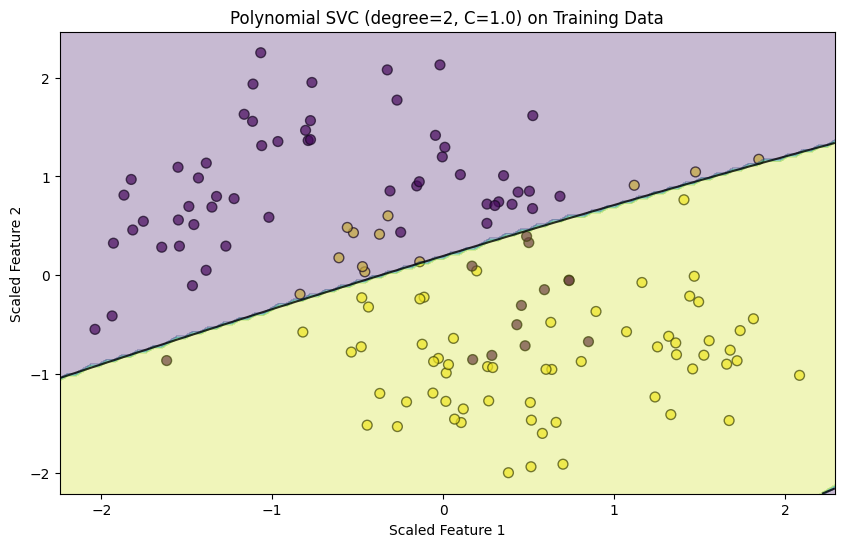

Polynomial Kernel: degree=3, C=1.0 -> Test Accuracy = 0.9333


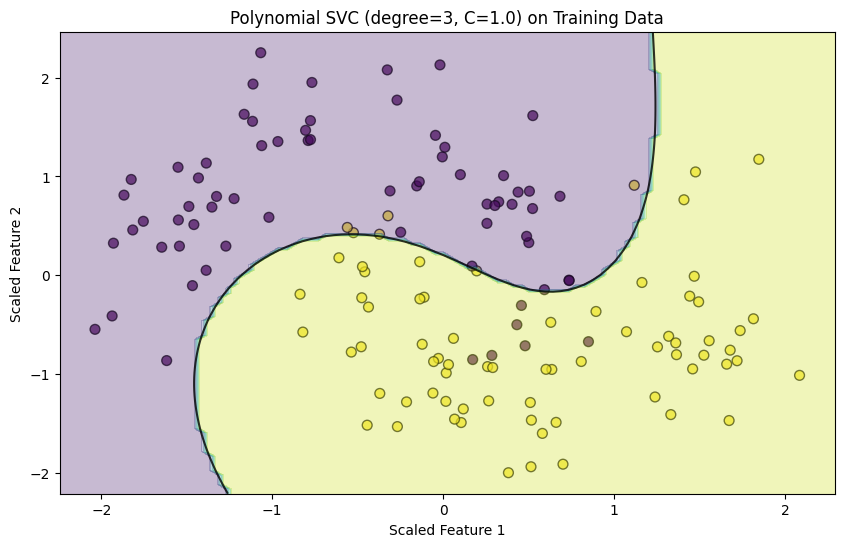

Polynomial Kernel: degree=5, C=1.0 -> Test Accuracy = 0.9500


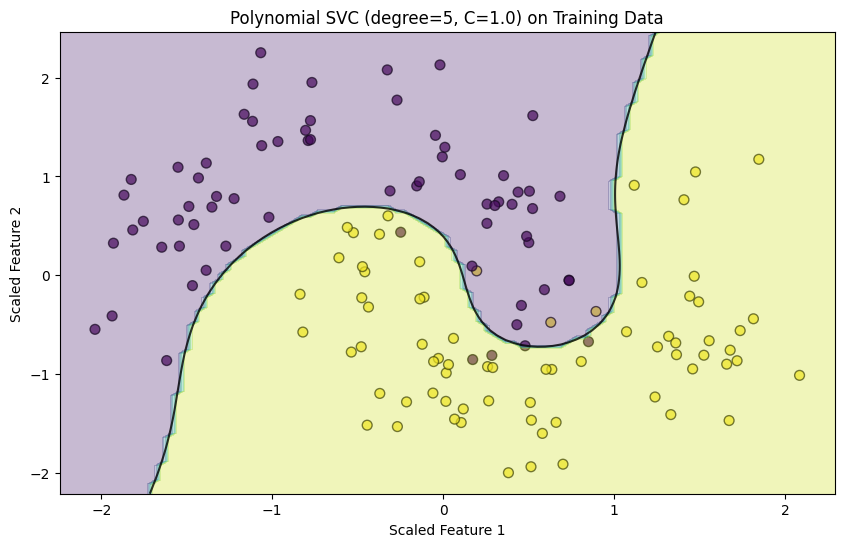

In [13]:
# --- 5. SVC with Polynomial Kernel - Effect of degree ---
print("\n--- SVC with Polynomial Kernel (make_moons) ---")
degrees_poly = [2, 3, 5]
c_poly = 1.0
gamma_poly = 'scale' # default gamma for poly

for deg in degrees_poly:
    poly_svc = SVC(kernel='poly', degree=deg, C=c_poly, gamma=gamma_poly, coef0=1, random_state=42) # coef0 often helps poly
    poly_svc.fit(X_train_moons, y_train_moons)
    y_pred_poly = poly_svc.predict(X_test_moons)
    accuracy_poly = accuracy_score(y_test_moons, y_pred_poly)
    print(f"Polynomial Kernel: degree={deg}, C={c_poly} -> Test Accuracy = {accuracy_poly:.4f}")
    plot_svc_decision_boundary_moons(poly_svc, X_train_moons, y_train_moons,
                                     title=f'Polynomial SVC (degree={deg}, C={c_poly}) on Training Data')




--- GridSearchCV for SVC with RBF Kernel (make_moons) ---
Best parameters found by GridSearchCV: {'C': 1, 'gamma': 5}
Best cross-validated accuracy: 0.9429
Test Set Accuracy with best RBF SVC: 0.9500


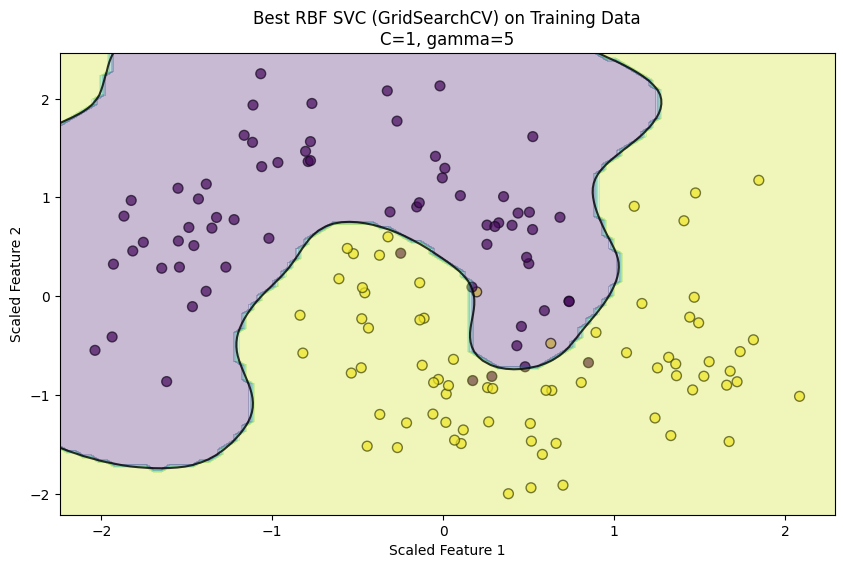

In [14]:
# --- 6. Hyperparameter Tuning with GridSearchCV for RBF Kernel ---
print("\n--- GridSearchCV for SVC with RBF Kernel (make_moons) ---")
param_grid_svm = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.1, 0.5, 1, 5, 10]
}
svm_gscv = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
svm_gscv.fit(X_train_moons, y_train_moons)

print(f"Best parameters found by GridSearchCV: {svm_gscv.best_params_}")
print(f"Best cross-validated accuracy: {svm_gscv.best_score_:.4f}")

best_svm_moons = svm_gscv.best_estimator_
y_pred_best_svm = best_svm_moons.predict(X_test_moons)
accuracy_best_svm = accuracy_score(y_test_moons, y_pred_best_svm)
print(f"Test Set Accuracy with best RBF SVC: {accuracy_best_svm:.4f}")
plot_svc_decision_boundary_moons(best_svm_moons, X_train_moons, y_train_moons,
                                 title=f'Best RBF SVC (GridSearchCV) on Training Data\nC={svm_gscv.best_params_["C"]}, gamma={svm_gscv.best_params_["gamma"]}')


**Discussion for Non-Linear SVC Example:**
* The `make_moons` dataset clearly requires a non-linear decision boundary.
* **RBF Kernel:**
    * You'll see how different `gamma` values affect the "smoothness" or "wiggliness" of the boundary. A small `gamma` creates a very smooth boundary (potentially underfitting), while a large `gamma` can lead to a very complex boundary that might overfit the training data.
    * `C` still controls the trade-off between a smooth decision surface and classifying training points correctly.
* **Polynomial Kernel:**
    * The `degree` parameter will change the complexity of the polynomial boundary. Higher degrees can fit more complex shapes but also risk overfitting.
* **GridSearchCV:** This demonstrates a systematic way to find a good combination of `C` and `gamma` for the RBF kernel, leading to an optimized model for the given data.

These two examples illustrate the versatility of SVC for both linear and non-linear classification problems and highlight the importance of choosing appropriate kernels and tuning hyperparameters.